***
# Section: Setup
***

In [1]:
import numpy as np
import pandas as pd
#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display
from scipy.stats import chi2_contingency
from tabulate import tabulate
import scipy.stats as stats

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**

**Discussion:**

The dataset contains 23 columns. This can be divided into 5 sections. 
- Unique identifier which gives information about indivual passenger and their servey answers.
    - **id:** Categorical - **Nominal**
    - Data Type: **Integer**
    - Meaning: Survey Number: **1,2,3,4,5..**
- What is the overall result of each passengers answers.
    - **satisfaction_v2:** Categorical - **Nominal**
    - Data Type: **String**
    - Meaning: **Satisfied, Neutral or Disatisfied**
- Details about passenger
    - **Gender:** Categorical - **Nominal**
        - Data Type: **String**
        - Meaning: **Male, Female**
    - **Customer Type**: Categorical - **Nominal**
         - Data Type: **String**
         - Meaning: **Loyal Customer, Disloyal Customer**
    - **Age:** Numerical - **Ratio**
         - Data Type: **Integer**
         - Meaning: **7 to 85**
    - **Type of Travel:** Categorical - **Nominal**
        - Data Type: **String**
        - Meaning: **Business Travel, Personal Travel**
    - **Class:** Categorical - **Nominal**
        - Data Type: **String**
        - Meaning: **Business, Eco, Eco Plus**
    - **Flight Distance:** Numerical - **Ratio**
        - Data Type:  **Integer**
        - Meaning: **Distance travelled by passenger**
- Survey questions and rating given by passenger
    - **Seat comfort:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1..)**
    - **Departure/Arrival time convenient:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1)**
    - **Food and drink:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1)**
    - **Gate location:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1)**
    - **Inflight wifi service:** Categorical - **Ordinal**
        - **Data Type: Float**
        - **Meaning: Ratings (0,1)**
    - **Inflight entertainment:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1)**
    - **Online support:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1)**
    - **Ease of Online booking:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1)**
    - **On-board service:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1)**
    - **Leg room service:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1)**
    - **Baggage handling:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (1,2..)**
    - **Checkin service:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1..)**
    - **Cleanliness:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1..)**
    - **Online boarding:** Categorical - **Ordinal**
        - **Data Type: Integer**
        - **Meaning: Ratings (0,1..)**
- Conditions: Actual flight delays (arrival, departure)
    - **Departure Delay in Minutes:** Numerical - **Ratio**
        - **Data Type: Integer**
        - **Meaning: Ratings (1,2,3..)**
    - **Arrival Delay in Minutes:** Numerical - **Ratio**
        - **Data Type: Float**
        - **Meaning: Ratings (1,2,3..)**


- The given dataset provides information about following sections: Number of survey's collected, Overall outcome, Passenger Information, Survey Questions and Flight delay time. In the above part, which attribute lies under which section is shown and details about the attributes are written.
- The given data does contain some errors, inconsistencies and missing values. In this EDA step, all these points will be handled so that it can be used for model traning.
- The given dataset is relevant and appropriate to the project. 



  

### **Load the Dataset.**

In [2]:
dataset = pd.read_csv("Satisfaction_with_error.csv", index_col = 0)
dataset

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,,,
1,neutral or dissatisfied,Male,disloyal Customer,48,Business travel,Business,2211,3,3,3,3,5.0,3,5,5,3,2,5,4,5,5,2,5.0
2,satisfied,Female,Loyal Customer,35,Business travel,Business,840,2,2,2,2,3.0,5,4,5,5,5,5,3,5,5,26,39.0
3,satisfied,Male,Loyal Customer,41,Business travel,Business,879,4,4,4,4,5.0,5,5,3,3,3,3,4,3,5,0,0.0
4,satisfied,Male,Loyal Customer,50,Business travel,Business,1932,2,2,2,2,4.0,4,5,5,5,5,5,3,5,4,0,0.0
5,satisfied,Female,Loyal Customer,49,Business travel,Business,3512,3,3,3,3,4.0,5,4,3,3,4,3,3,3,5,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129876,neutral or dissatisfied,Male,Loyal Customer,28,Personal Travel,Eco Plus,1916,4,4,4,2,4.0,4,1,4,5,4,4,4,5,4,2,3.0
129877,neutral or dissatisfied,Male,Loyal Customer,41,Personal Travel,Eco Plus,1483,3,5,3,4,2.0,3,2,2,5,5,5,5,4,2,0,0.0
129878,neutral or dissatisfied,Male,Loyal Customer,42,Personal Travel,Eco Plus,1685,2,5,2,1,3.0,2,3,3,3,4,5,4,4,3,6,14.0


In [3]:
dataset.info(verbose="True")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129881 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129880 non-null  object 
 1   Gender                             129881 non-null  object 
 2   Customer Type                      129881 non-null  object 
 3   Age                                129881 non-null  int64  
 4   Type of Travel                     129881 non-null  object 
 5   Class                              129881 non-null  object 
 6   Flight Distance                    129881 non-null  int64  
 7   Seat comfort                       129881 non-null  int64  
 8   Departure/Arrival time convenient  129881 non-null  int64  
 9   Food and drink                     129881 non-null  int64  
 10  Gate location                      129881 non-null  int64  
 11  Inflight wifi service              1298

**Discussion:**

The provided Excel workbook contains three sheets. To begin, I selected the 'satisfaction_with_errors' sheet, which has been altered to include errors such as missing or incorrect values, duplicated records, and more.

In this step, I created a CSV file specifically containing the 'satisfaction_with_errors' data from the original Excel workbook and used the created csv for dataset loading. I employed the Pandas library. This loaded file will is used for further analysis. This has been stored in 'dataset' variable.

A consice summary of the dataset giving information regarding the datatype, count of non-null values and memory usage is shown for better understanding.

In [4]:
dataset.describe(include='all')

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880,129881,129881,129881.000000,129881,129881,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129880.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129488.000000
unique,4,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,satisfied,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71085,65900,106101,NaN,89694,62161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,39.428038,NaN,NaN,1981.408281,2.838575,2.990622,2.851972,2.990414,3.249115,3.383482,3.519707,3.472325,3.465064,3.485891,3.695660,3.340804,3.705746,3.352592,14.713838,15.091267
std,NaN,NaN,NaN,15.119330,NaN,NaN,1027.111689,1.393000,1.527241,1.443746,1.305968,1.318820,1.346055,1.306506,1.308129,1.270837,1.292228,1.156489,1.260578,1.151779,1.298711,38.071006,38.465534
min,NaN,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,27.000000,NaN,NaN,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,NaN,NaN,NaN,40.000000,NaN,NaN,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,NaN,NaN,NaN,51.000000,NaN,NaN,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


**Discussion:**


For the all the attributes basic statistical analysis is provided - 

- Numerical Attributes: count, mean, std, min, percentile, max
- Categorical Attributes: count, unique, top, frequency

This step is performed to gain an overview of data and it's distribution. 

In [5]:
##*********Operation on satisfaction_v2:***********

mode = dataset['satisfaction_v2'].mode()
print("Most frequent overall answer: ", mode)
unique_values = dataset['satisfaction_v2'].unique()
print("Unique values in Satisfaction_v2: ", unique_values)
value_counts = dataset['satisfaction_v2'].value_counts(dropna=False)
print("\nCount of each value in Satisfied_v2:\n", value_counts)

Most frequent overall answer:  0    satisfied
dtype: object
Unique values in Satisfaction_v2:  ['neutral or dissatisfied' 'satisfied' nan 'satisfied   ' 'satisfed']

Count of each value in Satisfied_v2:
 satisfied                  71085
neutral or dissatisfied    58793
satisfed                       1
satisfied                      1
NaN                            1
Name: satisfaction_v2, dtype: int64


In [6]:
Other = 3
Satisfied = 71085
Neutral_dissatisfied = 58793
total_count = 129881

other_per = (Other / total_count) * 100
satisfied_per = (Satisfied / total_count) * 100
neutral_dissatisfied_per = (Neutral_dissatisfied / total_count) * 100

print("Percentage of 'Other': {:.5f}%".format(other_per))
print("Percentage of 'Satisfied': {:.2f}%".format(satisfied_per))
print("Percentage of 'Neutral or Dissatisfied': {:.2f}%".format(neutral_dissatisfied_per))

Percentage of 'Other': 0.00231%
Percentage of 'Satisfied': 54.73%
Percentage of 'Neutral or Dissatisfied': 45.27%


**Discussion:**

It was observed that 'satisfaction_v2' had 4 unique values. As this attribute should have two classes: 'Satisfied' and 'Neutral or Dissatisfied', other two are considered as errors.

After printing the count of incorrect it was observed that there was 1 spelling mistake, 1 extra space added and 1 empty str. These are considered as errors and will be handled further. 

For better understanding, percentage of these attributes is calculated. This gave distribution of responces given by the participants.

In [7]:
###*********CUSTOMER RELATED DATA:***********

CustomerInfo = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for column in CustomerInfo:
    val = dataset[column].unique()
    print(f"Column: {column}: {val}")
    
    cnt = dataset[column].value_counts(dropna=False)
    print(f"Individual Count for {column}:\n{cnt}\n")


Column: Gender: ['Male' 'Female']
Individual Count for Gender:
Female    65900
Male      63981
Name: Gender, dtype: int64

Column: Customer Type: ['disloyal Customer' 'Loyal Customer']
Individual Count for Customer Type:
Loyal Customer       106101
disloyal Customer     23780
Name: Customer Type, dtype: int64

Column: Type of Travel: ['Business travel' 'Personal Travel']
Individual Count for Type of Travel:
Business travel    89694
Personal Travel    40187
Name: Type of Travel, dtype: int64

Column: Class: ['Business' 'Eco' 'Eco Plus']
Individual Count for Class:
Business    62161
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64



**Discussion:**


Here, focus is given on catagorical columns of customer related data.
This step helped in examining the unique values, their counts and gain insights into the composition of the data.

In [8]:
#**************************************Age**************************************

# Age Groups
age_groups = ['Children (0 to 12)', 'Adolescents (13 to 17)', 'Adults (18 to 64)', 'Older Adults (above 65)']
age_ranges = [(0, 12), (13, 17), (18, 64), (65, float('inf'))]

dataset['Age Group'] = pd.cut(dataset['Age'], bins=[age_range[0] - 1 for age_range in age_ranges] + [float('inf')], labels=age_groups)

age_group_counts = dataset['Age Group'].value_counts()
print(age_group_counts)

Adults (18 to 64)          114051
Older Adults (above 65)      5983
Adolescents (13 to 17)       5053
Children (0 to 12)           4794
Name: Age Group, dtype: int64


**Discussion:**

Here, to further analyse Customer Related data, I created age groups. This tells information about the number of people participated in survey from different age group. This created column will be used further to gain insights in hypothesis if the age factor affects the overall ratings.

In [9]:
Ratings = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
           'Online boarding']

for column in Ratings:
    counts = dataset[column].value_counts(dropna=False).sort_index()
    print(f"Column: {column}")
    
    rating_range = range(int(counts.index.min()), int(counts.index.max()) + 1)
    
    for rating in rating_range:
        count = counts.get(rating, 0)
        if count > 0:
            print(f"Rating {rating}: {count}")
    
    print("\n")


Column: Seat comfort
Rating 0: 4798
Rating 1: 20949
Rating 2: 28726
Rating 3: 29183
Rating 4: 28398
Rating 5: 17827


Column: Departure/Arrival time convenient
Rating 0: 6665
Rating 1: 20828
Rating 2: 22794
Rating 3: 23184
Rating 4: 29593
Rating 5: 26817


Column: Food and drink
Rating 0: 5946
Rating 1: 21076
Rating 2: 27146
Rating 3: 28150
Rating 4: 27216
Rating 5: 20347


Column: Gate location
Rating 0: 2
Rating 1: 22565
Rating 2: 24519
Rating 3: 33546
Rating 4: 30088
Rating 5: 19161


Column: Inflight wifi service
Rating 0: 132
Rating 1: 14711
Rating 2: 27046
Rating 3: 27602
Rating 4: 31559
Rating 5: 28830


Column: Inflight entertainment
Rating 0: 2978
Rating 1: 11809
Rating 2: 19183
Rating 3: 24200
Rating 4: 41880
Rating 5: 29831


Column: Online support
Rating 0: 1
Rating 1: 13937
Rating 2: 17260
Rating 3: 21609
Rating 4: 41511
Rating 5: 35563


Column: Ease of Online booking
Rating 0: 18
Rating 1: 13436
Rating 2: 19952
Rating 3: 22417
Rating 4: 39920
Rating 5: 34137
Rating 33: 1

**Discussion:**

- I have given the count for rating for all the rating related attributes. This helped in understanding the frequency of different responses and distribution of ratings for various attributes. This is further visualized to gain better insights

Average Seat comfort: 2.84
Average Departure/Arrival time convenient: 2.99
Average Food and drink: 2.85
Average Gate location: 2.99
Average Inflight wifi service: nan
Average Inflight entertainment: 3.38
Average Online support: 3.52
Average Ease of Online booking: 3.47
Average On-board service: 3.47
Average Leg room service: 3.49
Average Baggage handling: 3.70
Average Checkin service: 3.34
Average Cleanliness: 3.71
Average Online boarding: 3.35


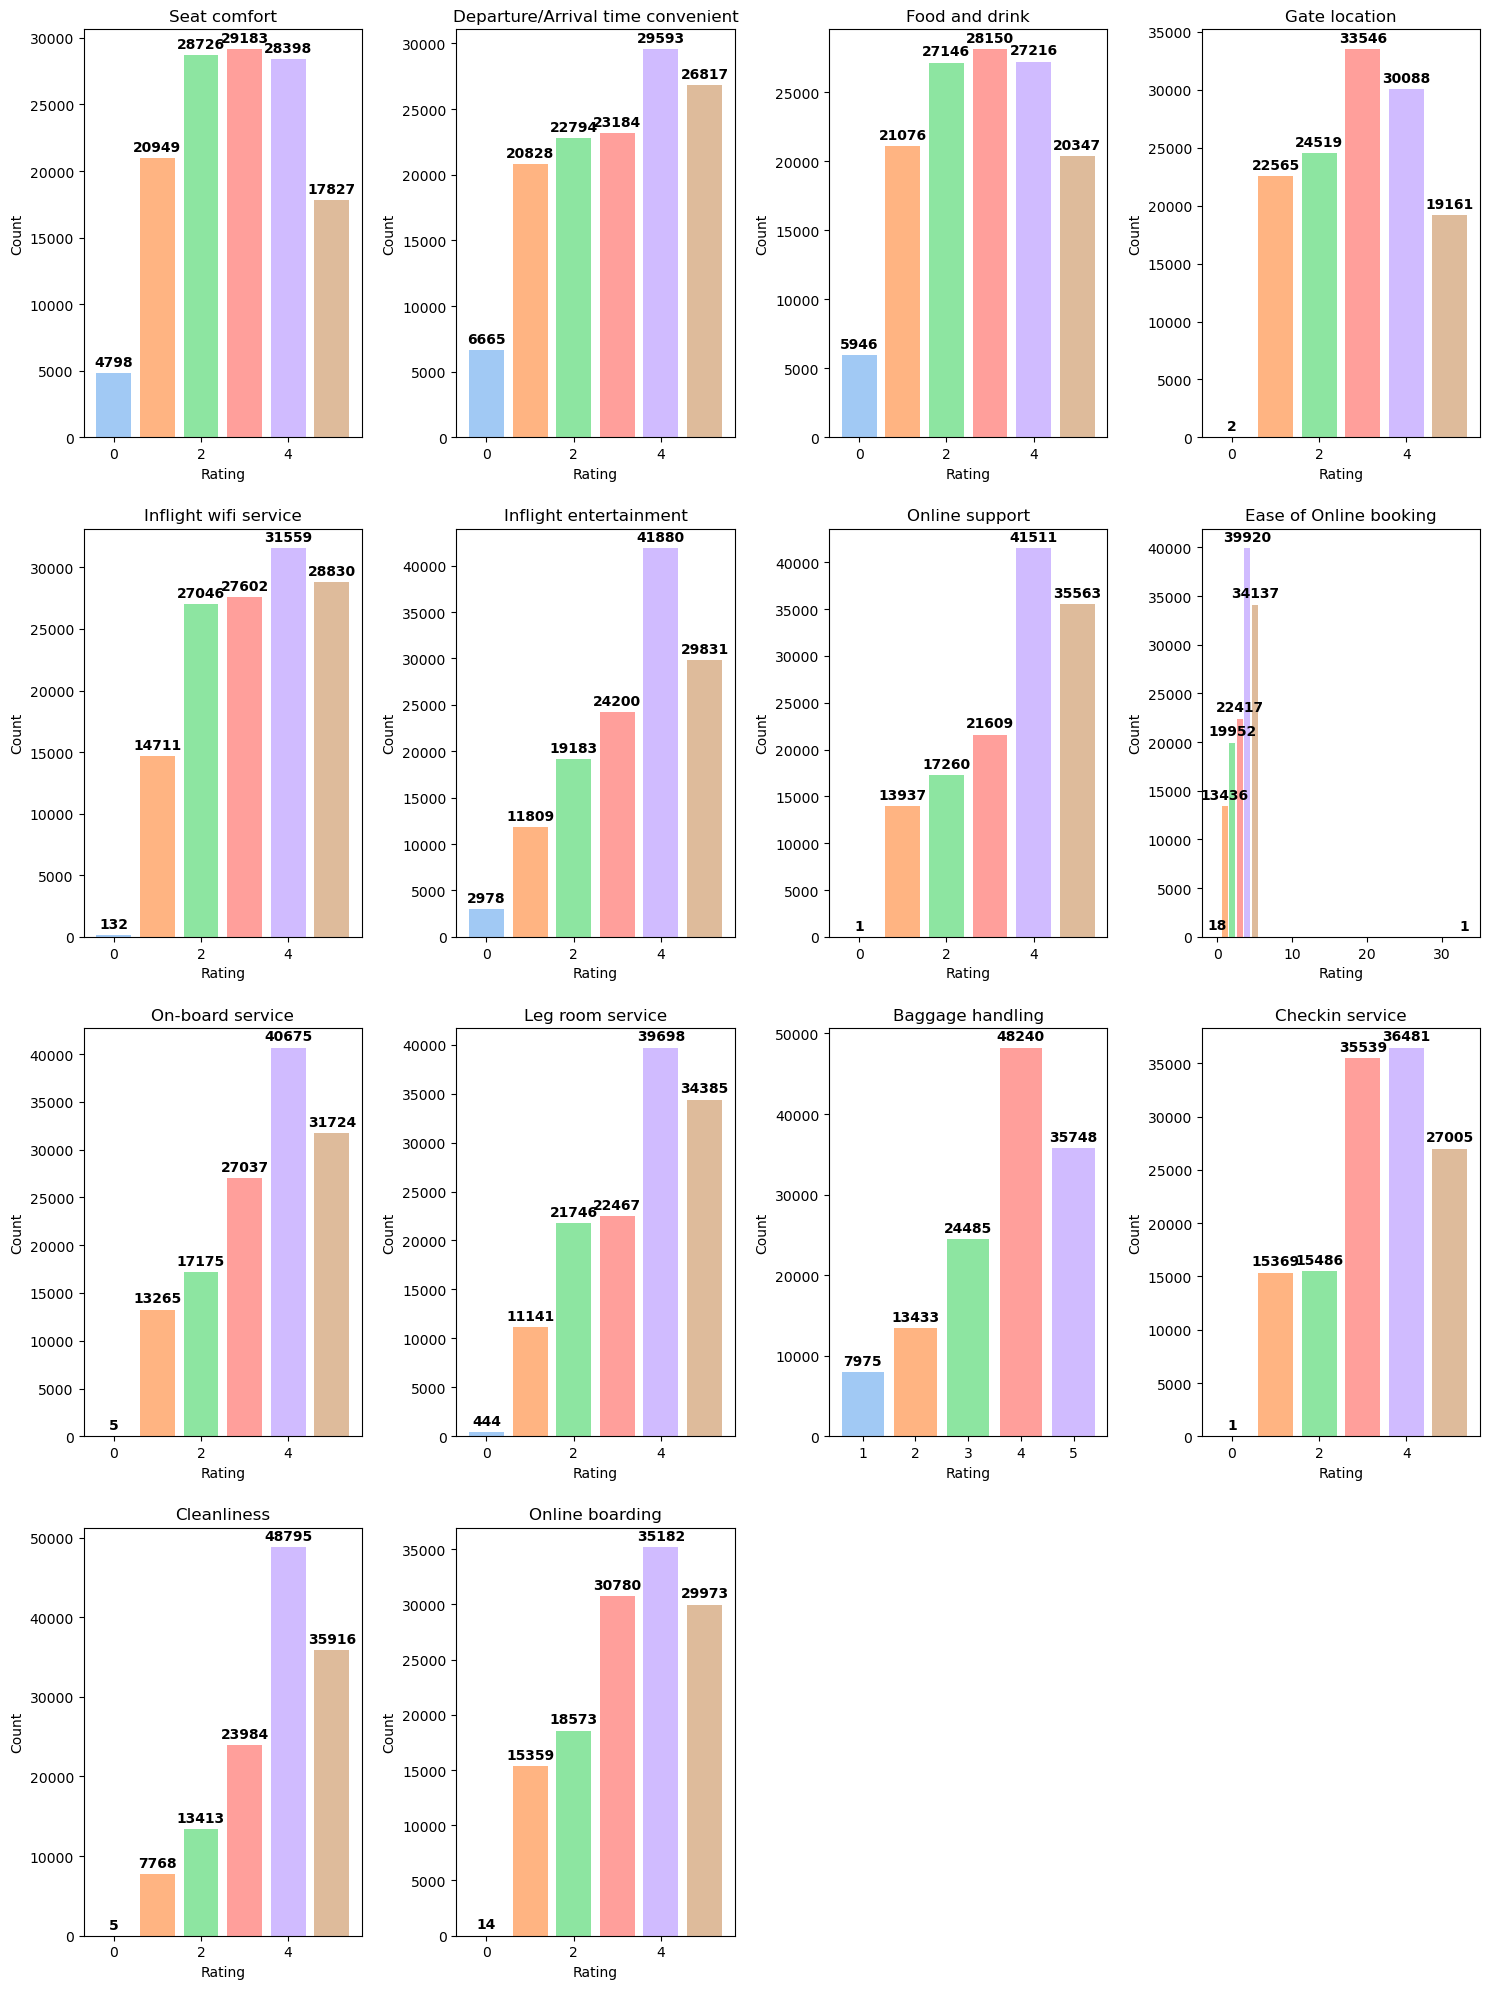

In [10]:
#Rating Insights

#Subplot
cols = 4
rows = -(-len(Ratings) // cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

avg_ratings = {}

for i, column in enumerate(Ratings):
    counts = dataset[column].value_counts().sort_index()
    unique_ratings = sorted(dataset[column].unique())
    
    weighted_sum = sum(rating * counts.get(rating, 0) for rating in unique_ratings)
    total_count = counts.sum()
    avg = weighted_sum / total_count
    
    avg_ratings[column] = avg
    
    ax = axes[i]
    
    PastelPal = sns.color_palette("pastel", n_colors=len(unique_ratings))
    bars = ax.bar(unique_ratings, [counts.get(rating, 0) for rating in unique_ratings], color=PastelPal)
    
    ax.set_title(f"{column}")
    ax.set_xlabel("Rating")
    ax.set_ylabel("Count")
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

for i in range(len(Ratings), cols * rows):
    fig.delaxes(axes[i])

for column, avg in avg_ratings.items():
    print(f"Average {column}: {avg:.2f}")

plt.tight_layout(h_pad=2.0, w_pad=1.5)
plt.show()


**Discussion:**

Here, I have provided insights for Ratings attribute. 

- Average Rating for all rating related attributes: 
    - Average Seat comfort: 2.84
    - Average Departure/Arrival time convenient: 2.99
    - Average Food and drink: 2.85
    - Average Gate location: 2.99
    - Average Inflight wifi service: nan
    - Average Inflight entertainment: 3.38
    - Average Online support: 3.52
    - Average Ease of Online booking: 3.47
    - Average On-board service: 3.47
    - Average Leg room service: 3.49
    - Average Baggage handling: 3.70
    - Average Checkin service: 3.34
    - Average Cleanliness: 3.71
    - Average Online boarding: 3.35
        - This shows what the overall avg ratings each question got. We can see comparitively for Seat Comfort, departure arrival time, food and drinks and gata location the avg rating lies below 3. 
        - We can also see that there is presence of missing values in Inflight wifi service. These missing values will be further analysed. These values can either be replaced or can be deleted.

- Visualizing the individual count for each rating:
    - Presence of outlier is identified here for 'Ease of online booking'. This outlier can either be removed or replaced after further analysis.
    
- It also interesting to observe that many people have given rating 4 and 5 to different services provided by airline but at the same time, many people have given lower rating as well.

    


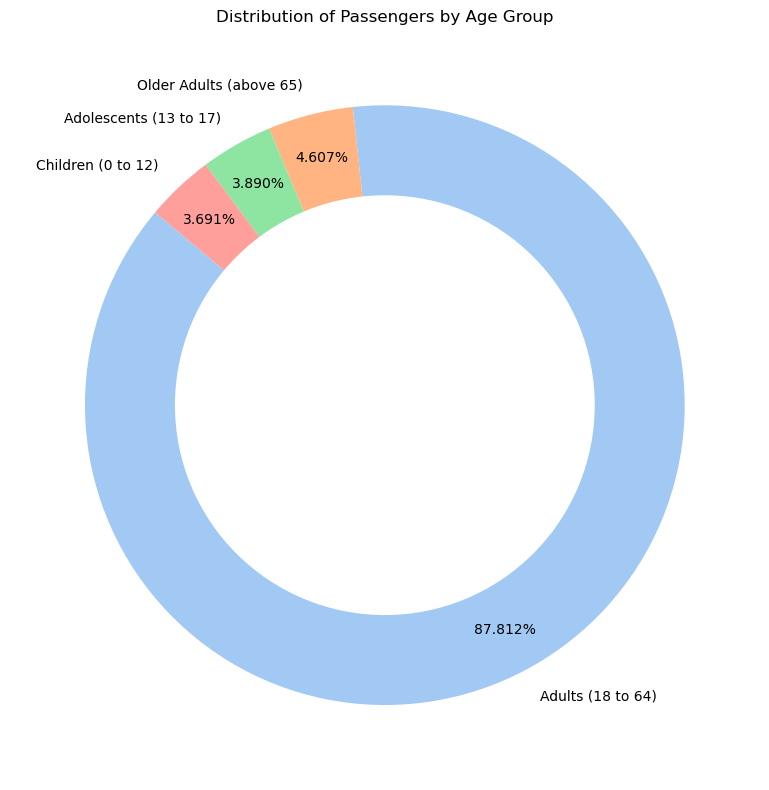

In [11]:
#********************AGE******************

plt.figure(figsize=(8, 8))
plt.pie(age_group_counts.values, labels=age_group_counts.index, colors=PastelPal, autopct='%1.3f%%', startangle=140, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Passengers by Age Group')

plt.tight_layout()
plt.show()


**Discussion:**

This visualization tells information about the percentage of number of people participated in survey from different age groups.

We can see that Adults from 18 to 64 have the most significant participation compared to other age groups. This insight can be further used to understand preferences that this particular age group has and will help in finding trends and patterns.

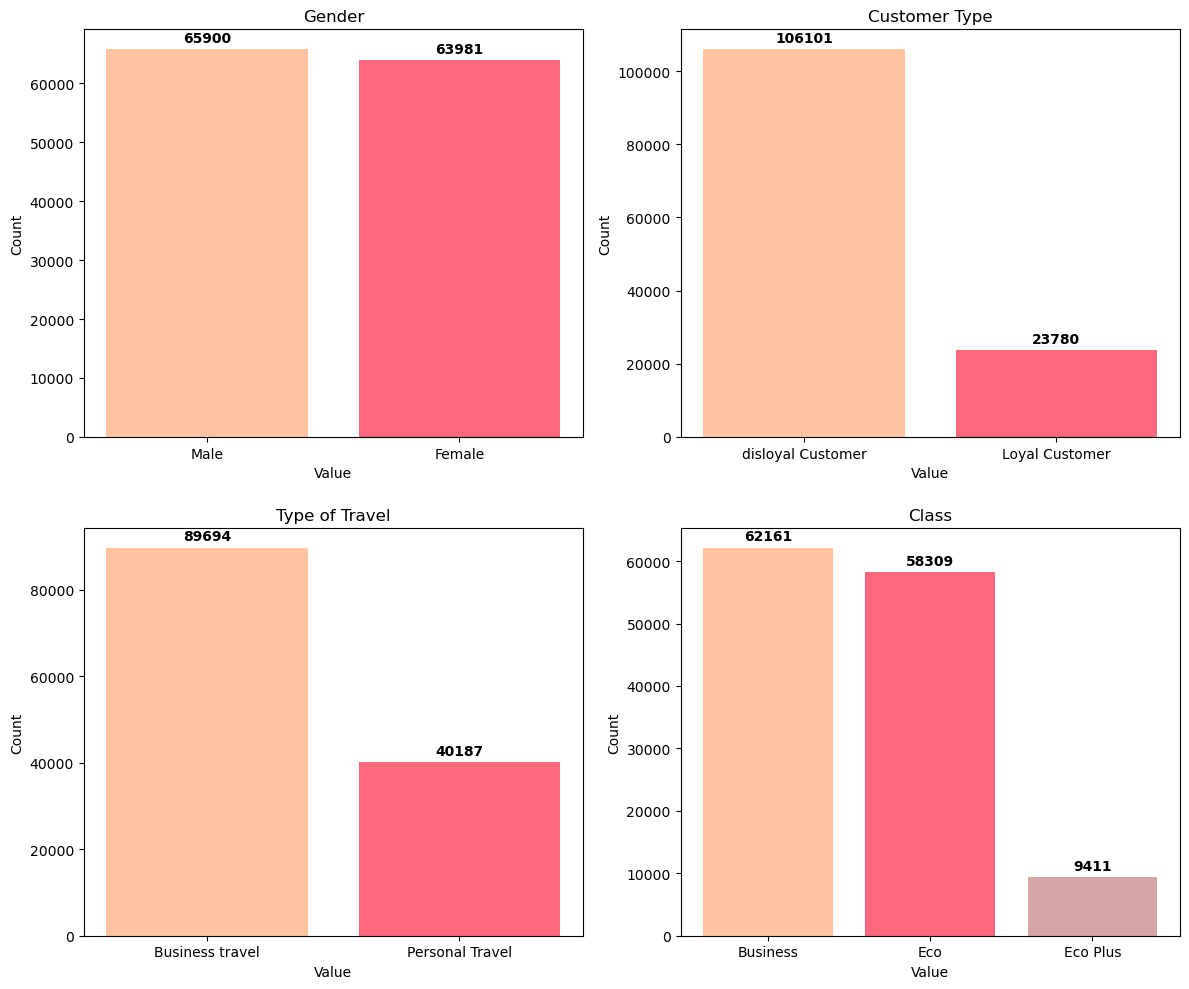

In [12]:
#Customer related visualizations
colr = ['#FFC3A0', '#FF677D', '#D4A5A5']

CustomerInfo = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
fig, axes = plt.subplots(len(CustomerInfo)//2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(CustomerInfo):
    unique_values = dataset[column].unique()
    value_counts = dataset[column].value_counts(dropna=False)
    
    ax = axes[i]
    
    bars = ax.bar(unique_values, value_counts, color=colr)
    
    ax.set_title(f"{column}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout(h_pad=2.0)
plt.show()


**Discussion:**

Here, focus is given on catagorical columns of customer related data and it is is visualized to gain deeper insights. 

From the bar graph plots we can see - 
- Gender: There is approximately even distribution.
- Customer Type: There are significantly more number of disloyal customers than loyal customers who participated in survey. This is an interesting find because we will understand if there was a bias while filling the survey. 
- Type of Travel: More number of passengers travelled for Business purpose than Personal Travel.
- Class: There are less number of passengers traveling in Eco Plus and maximum travelled by Business class who were a part of the survey.
- Significant number of the people travel for Business purpose. Here airlne can plan strategies to cater to these people as well. 

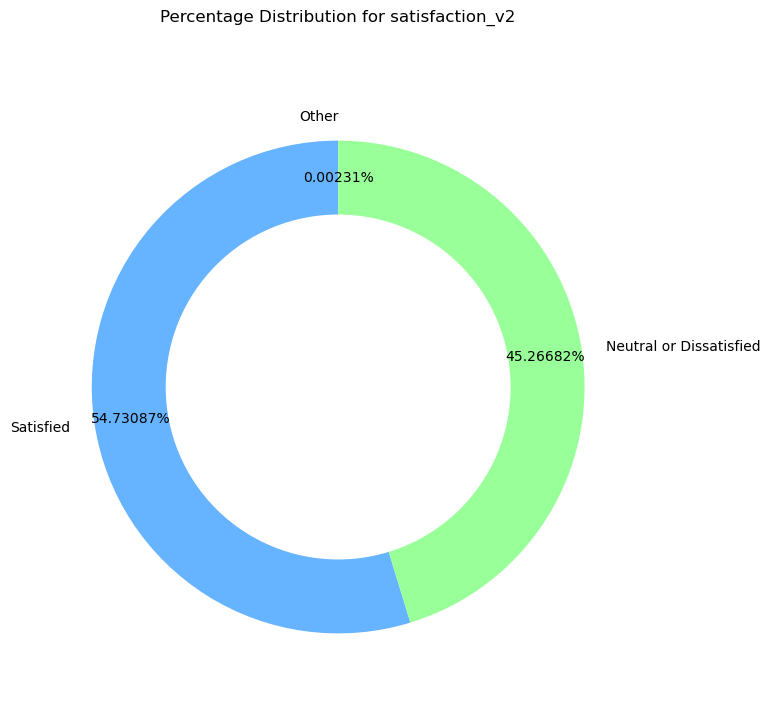

In [13]:
#Data
labels = ['Other', 'Satisfied', 'Neutral or Dissatisfied']
sizes = [3, 71085, 58793]
colors = ['#ff9999', '#66b3ff', '#99ff99']

# pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.5f%%', startangle=90, pctdistance=0.85)
pie = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(pie)
plt.title("Percentage Distribution for satisfaction_v2", y=1.08)
plt.show()


**Discussion:**

- Considering that there were few errors in this attribute, I have stored those in Other. In further steps these errors will be resolved. But as the number is less, this will not affect the overall understanding of the percentage. 
- In this diagram, we can see ~54% people were satisfied and ~45% neutral or dissatisfied. 

**Discussion**

- By visualising indivisual attributes, we can see can understand how these attributes are resulting in overall results. We got indepth understanding and this will be used to for correlation between these attributes. 
- This also helped in understanding the errors present. In further steps -> I will be dealing with outliers, missing values, incorrect inputs, etc. In the above explanation, details of these attributes is mentioned.


**Discussion:**

In this step, I would be looking into quality of the data.


In [14]:
#Missing Values
MVal = dataset.isna().sum()

missingval = MVal[MVal > 0]
if not missingval.empty:
    print("Missing Values Information:")
    print(missingval)
else:
    print("No missing values found in any column.")

Missing Values Information:
satisfaction_v2               1
Inflight wifi service         1
Arrival Delay in Minutes    393
dtype: int64


**Discussion:**

- Missig Values: Missing values are present in 3 attributes. There aresignificant number of missing values in 'Arrival Delay in Minutes' column whereas for other 2 attributes it is just 1. 
- But it is essential to deal with missing values for all the three attributes. 
- Satisfaction_v2: This being a string I plan to either relace it with 'Unknown' or replace it with value that has maximum number of occurances. 
- 'Inflight wifi service', 'Arrival Delay in Minutes': For these attributes - I plan to replace null values with the avg. of that column. 

This will help in keeping the useful information and there won't be loss of data. 

In [15]:
# Duplicate rows
duplicate_rows = dataset.duplicated()
duplicates = dataset[duplicate_rows]
print("Duplicate Values Information:" if not duplicates.empty else "No duplicate values found in the dataset.")
print(duplicates.head(23))


Duplicate Values Information:
      satisfaction_v2  Gender   Customer Type  Age   Type of Travel     Class  \
id                                                                              
10481       satisfied  Female  Loyal Customer   50  Business travel  Business   

       Flight Distance  Seat comfort  Departure/Arrival time convenient  \
id                                                                        
10481             1881             0                                  0   

       Food and drink  Gate location  Inflight wifi service  \
id                                                            
10481               0              2                    2.0   

       Inflight entertainment  Online support  Ease of Online booking  \
id                                                                      
10481                       4               4                       2   

       On-board service  Leg room service  Baggage handling  Checkin service  \
id        

**Discussion:**

Here, we see that there is one duplicate row. As a part of data preprocessing technique, this duplicate row can be dropped. 

Columns with Outliers:

 Flight Distance has 2581 outliers and - Good Range: [-418.5, 4321.5].

 Ease of Online booking has 1 outliers and - Good Range: [-2.5, 9.5].

 On-board service has 13270 outliers and - Good Range: [1.5, 5.5].

 Checkin service has 15370 outliers and - Good Range: [1.5, 5.5].

 Departure Delay in Minutes has 18099 outliers and - Good Range: [-18.0, 30.0].

 Arrival Delay in Minutes has 17493 outliers and - Good Range: [-19.5, 32.5].


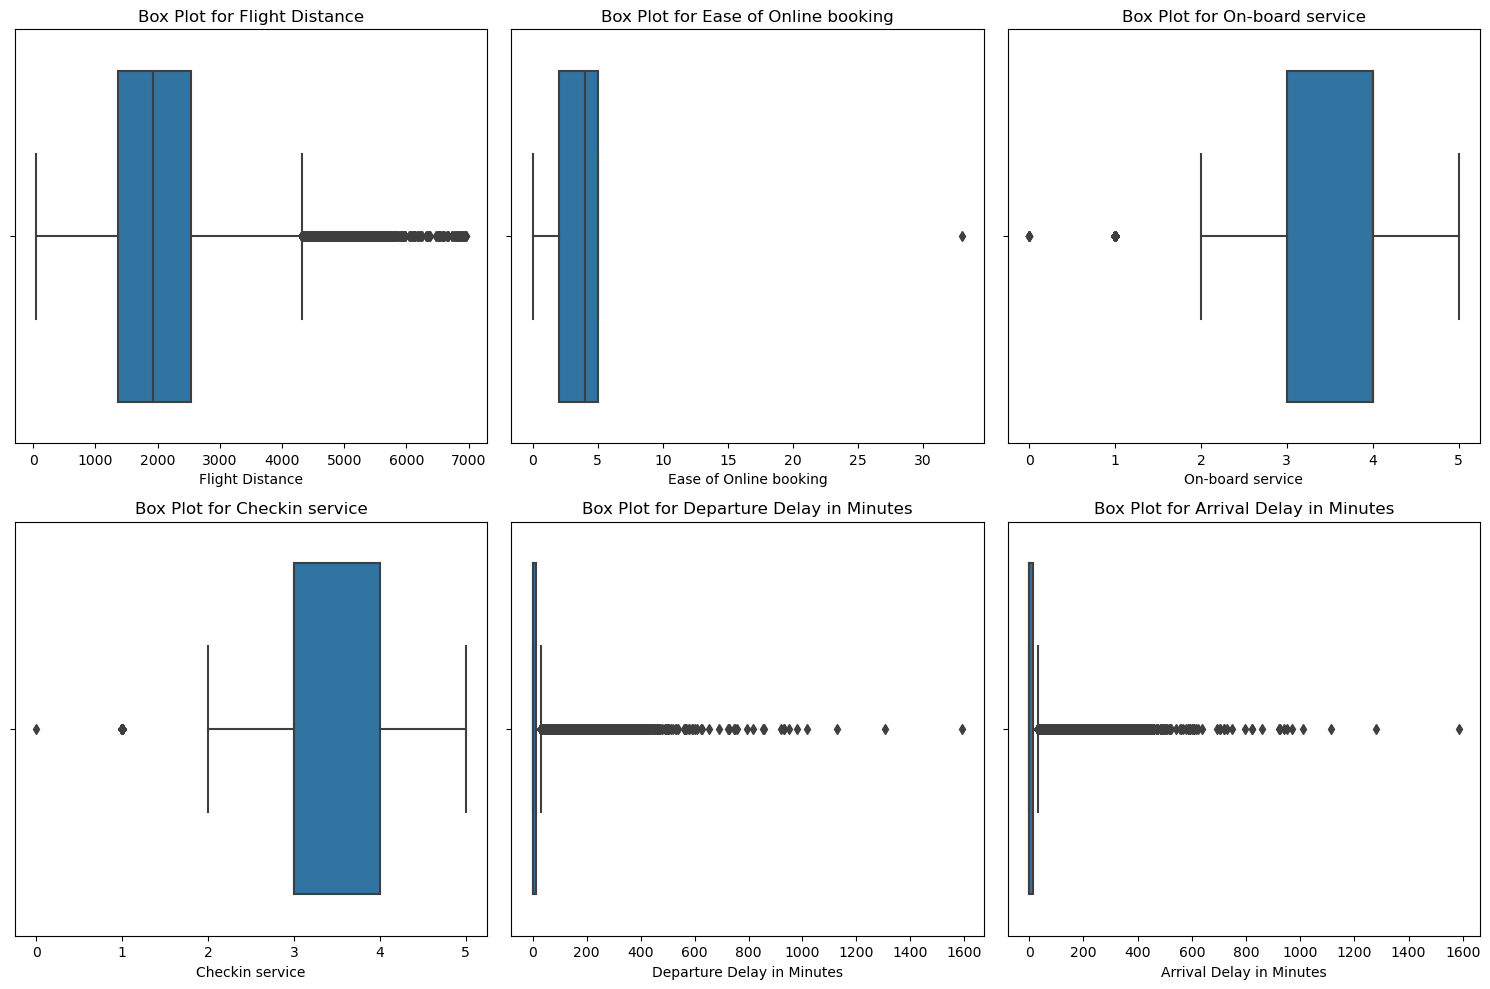

In [16]:
#Outliers
NumCol = dataset.select_dtypes(include=[np.number])

Q1 = NumCol.quantile(0.25)
Q3 = NumCol.quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5

def detect_outliers(column):
    lower_bound = Q1[column] - outlier_threshold * IQR[column]
    upper_bound = Q3[column] + outlier_threshold * IQR[column]
    return (NumCol[column] < lower_bound) | (NumCol[column] > upper_bound)

outlier_df = pd.DataFrame({column: detect_outliers(column) for column in NumCol.columns})

print("Columns with Outliers:")
for column in outlier_df.columns:
    if outlier_df[column].any():
        num_outliers = outlier_df[column].sum()
        low = Q1[column] - outlier_threshold * IQR[column]
        high = Q3[column] + outlier_threshold * IQR[column]
        print(f"\n {column} has {num_outliers} outliers and - Good Range: [{low}, {high}].")

columns_with_outliers = [column for column in outlier_df.columns if outlier_df[column].any()]
num_rows = (len(columns_with_outliers) + 2) // 3
num_cols = min(len(columns_with_outliers), 3)  
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(columns_with_outliers):
    sns.boxplot(x=NumCol[column], ax=axes[i])
    axes[i].set_title(f"Box Plot for {column}")
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


**Discussion**

- After processing the data outliers are seen in the following attributes:
     - Flight Distance has 2581 outliers 
     - Ease of Online booking has 1 outliers 
     - On-board service has 13270 outliers 
     - Checkin service has 15370 outliers 
     - Departure Delay in Minutes has 18099 outliers 
     - Arrival Delay in Minutes has 17493 outliers
- Here, I have identified good range for these outliers.
- Using Capping and flooring technique, these outliers will be handled further.


In [17]:
#CATEGORICAL VS CATEGORICAL

categorical_attributes = ['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

results_df = pd.DataFrame(columns=['Attribute 1', 'Attribute 2', 'Chi-square', 'P-value'])

for attr1 in categorical_attributes:
    for attr2 in categorical_attributes:
        if attr1 != attr2:
            contingency_table = pd.crosstab(dataset[attr1], dataset[attr2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results_df = results_df.append({'Attribute 1': attr1, 'Attribute 2': attr2, 'Chi-square': chi2, 'P-value': p}, ignore_index=True)

print("Chi-Square Test Results:")
print(tabulate(results_df, headers='keys', tablefmt='psql'))


Chi-Square Test Results:
+----+-----------------+-----------------+--------------+-------------+
|    | Attribute 1     | Attribute 2     |   Chi-square |     P-value |
|----+-----------------+-----------------+--------------+-------------|
|  0 | satisfaction_v2 | Gender          |    5851.58   | 0           |
|  1 | satisfaction_v2 | Customer Type   |   11119.1    | 0           |
|  2 | satisfaction_v2 | Type of Travel  |    1550.52   | 0           |
|  3 | satisfaction_v2 | Class           |   12672.8    | 0           |
|  4 | Gender          | satisfaction_v2 |    5851.58   | 0           |
|  5 | Gender          | Customer Type   |     124.284  | 7.30123e-29 |
|  6 | Gender          | Type of Travel  |      11.6999 | 0.00062502  |
|  7 | Gender          | Class           |      20.8907 | 2.90827e-05 |
|  8 | Customer Type   | satisfaction_v2 |   11119.1    | 0           |
|  9 | Customer Type   | Gender          |     124.284  | 7.30123e-29 |
| 10 | Customer Type   | Type of Travel

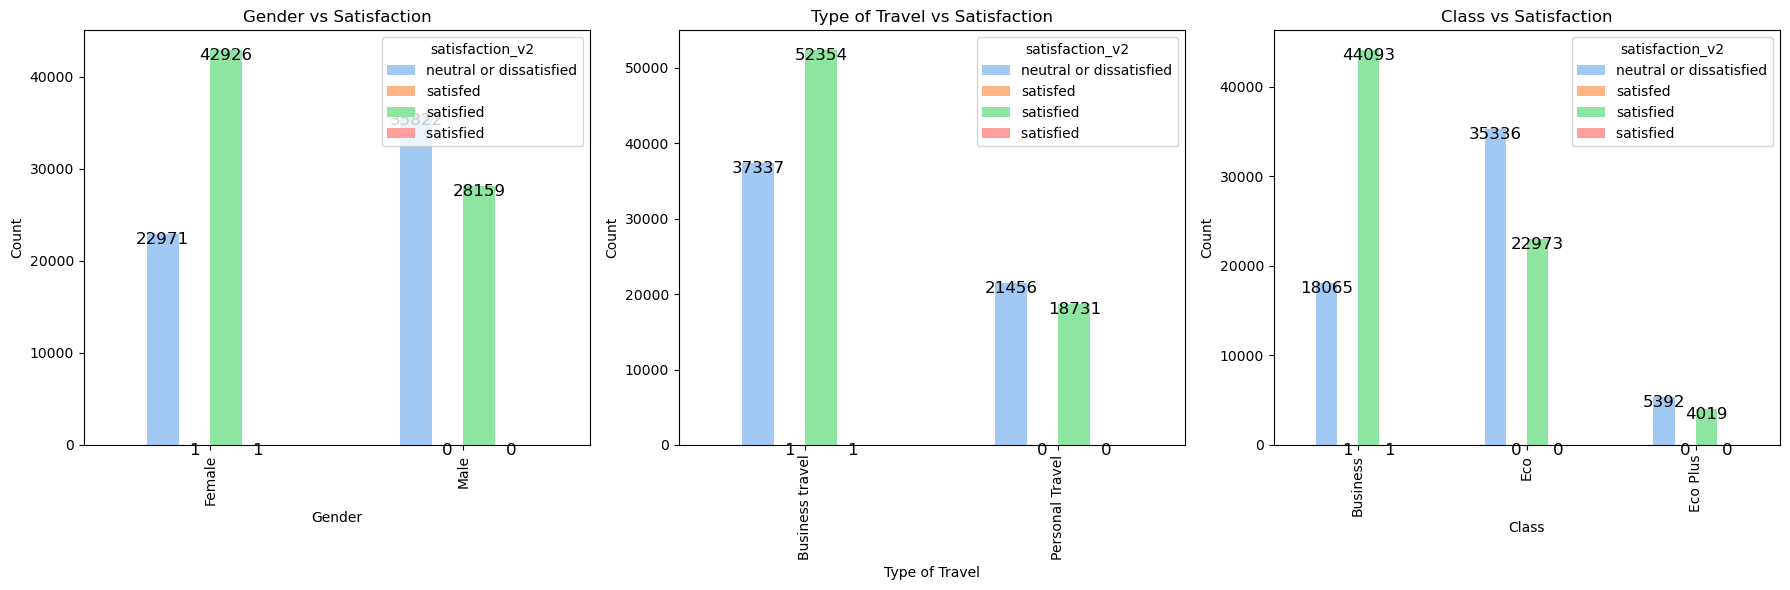

In [18]:
#Categorical Vs Categorical
sns.set_palette("pastel")
plot = ['Gender', 'Type of Travel', 'Class']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, column in enumerate(plot):
    cross_tab = pd.crosstab(dataset[column], dataset['satisfaction_v2'])
    ax = cross_tab.plot(kind='bar', stacked=False, ax=axes[i])

    ax.set_title(f'{column} vs Satisfaction')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
    for p in ax.patches:
        height = p.get_height()
        width = p.get_x() + p.get_width() / 2.
        ax.annotate(f'{int(height)}', xy=(width, height), xytext=(0, -10), textcoords='offset pixels',
                    ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


**Discussion:**

Using the **Chi-square test**, I have analysed 2-attribute relationships between Categorical Vs Categorical attributes. 

From the results, it is evident that there is significant association between attributes. 
For instance:
- satisfaction_v2 vs. Gender: The chi-square value is 5851.58, and the p-value is 0. This suggests a significant association between passenger satisfaction and gender.

Similarly, we can see there is strong association between almost all the attributes.

To further show this, crosstabulation method is used to show association between 'satisfaction_v2' and 'Gender', 'Type of Travel', 'Class'.

This helps in understanding that these attributes have association and are not redundant attributes

In [19]:
#Categorical vs Numerical

numerical_vars = ['Age', 'Flight Distance', 'Departure Delay in Minutes']
categorical_vars = ['satisfaction_v2']

anova_results = pd.DataFrame(columns=['Numerical Variable', 'Categorical Variable', 'F-statistic', 'P-value'])

for num_var in numerical_vars:
    for cat_var in categorical_vars:
        group_data = [group[1][num_var] for group in dataset.groupby(cat_var)]
        
        f_statistic, p_value = stats.f_oneway(*group_data)
        
        anova_results = anova_results.append({
            'Numerical Variable': num_var,
            'Categorical Variable': cat_var,
            'F-statistic': f_statistic,
            'P-value': p_value
        }, ignore_index=True)

print(anova_results)


           Numerical Variable Categorical Variable  F-statistic        P-value
0                         Age      satisfaction_v2   611.687718   0.000000e+00
1             Flight Distance      satisfaction_v2    68.090155   5.456234e-44
2  Departure Delay in Minutes      satisfaction_v2   237.816913  6.732158e-154


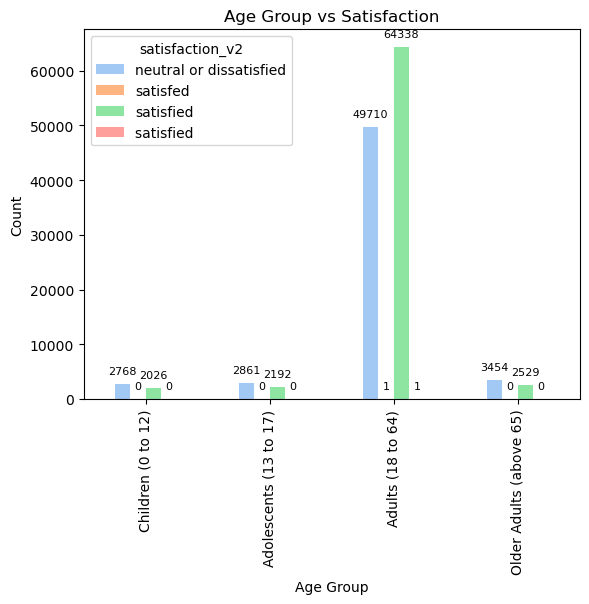

In [20]:
# Categorical vs Numerical
sns.set_palette("pastel")
cross_tab1 = pd.crosstab(dataset['Age Group'], dataset['satisfaction_v2'])
ax = cross_tab1.plot(kind='bar', stacked=False)

plt.title('Age Group vs Satisfaction')
plt.xlabel('Age Group')
plt.ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2.
    ax.annotate(f'{int(height)}', xy=(width, height), xytext=(0, 10), textcoords='offset pixels',
                ha='center', fontsize=8, color='black')

plt.show()

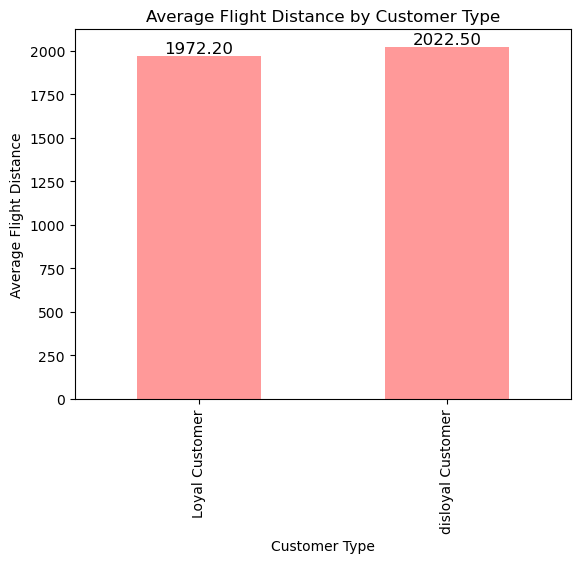

In [21]:
# Caterogical vs Numerical
average_flight_distance = dataset.groupby('Customer Type')['Flight Distance'].mean()
sns.set_palette(colors)
ax = average_flight_distance.plot(kind='bar')

plt.title('Average Flight Distance by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Flight Distance')
for i, v in enumerate(average_flight_distance):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()


**Discussion:**

ANOVA Test is used to find the relation between Categorical and Numerical attributes. 
- The test shows that there is significant relation the attributes. 
    - Categorical: 'satisfaction_v2'
    - Numerical: 'Age', 'Flight Distance', 'Departure Delay in Minutes'
    - With low p-value it is seen that there is categorical and numerical values are strongly associated with eachother along with the FStatistic value.
- To further show this, visualisation are shown to show the correlation between these attributes. 
    - cross tabulation for Age vs Satisfaction & Avg flight distance travelled by different customer types is also shown to show categorical correlation. 
    - It can be seen that, avg flight distance traveled by Disloyal customer is slightly more than loyal customers.
- Here, I observed that the 'satisfaction_v2' attribute has error. Due to this the visualized output shows error count as well.

In [22]:
#Numerical Vs Numerical

numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

numerical_df = dataset[numerical_columns]
correlation_matrix = numerical_df.corr()
print("Pearson Correlation Coefficients:")
print(correlation_matrix.to_string(float_format="%.2f"))


Pearson Correlation Coefficients:
                             Age  Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes
Age                         1.00            -0.25                       -0.01                     -0.01
Flight Distance            -0.25             1.00                        0.11                      0.11
Departure Delay in Minutes -0.01             0.11                        1.00                      0.97
Arrival Delay in Minutes   -0.01             0.11                        0.97                      1.00


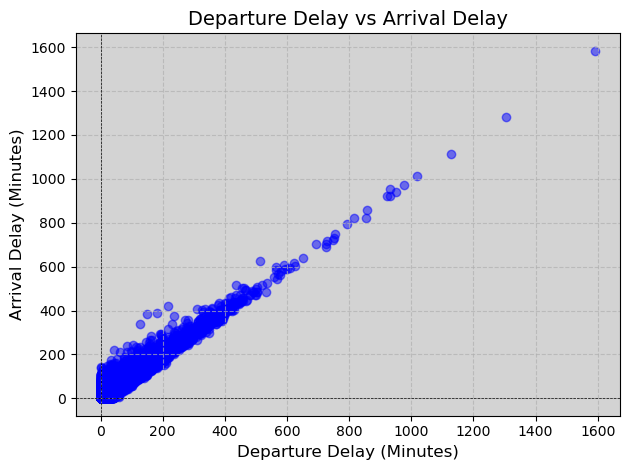

In [23]:
# Numerical vs Numerical

# Scatter plot for numerical attributes with blue color
plt.scatter(dataset['Departure Delay in Minutes'], dataset['Arrival Delay in Minutes'], color='blue', alpha=0.5)  # alpha adjusts transparency
plt.title('Departure Delay vs Arrival Delay', fontsize=14)
plt.xlabel('Departure Delay (Minutes)', fontsize=12)
plt.ylabel('Arrival Delay (Minutes)', fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('lightgray')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.tight_layout()
plt.show()


**Discussion:**

To find correlation between Numerical vs Numerical attributes I have used Pearson Correlation Coefficients.

This test shows: There is strong correlation between Departure Delay and Arrival delay (0.97 - close to 1).

This is also highlighted using a scatter plot. This may suggest that the flights that have delayed departure may have delayed arrival. 


***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

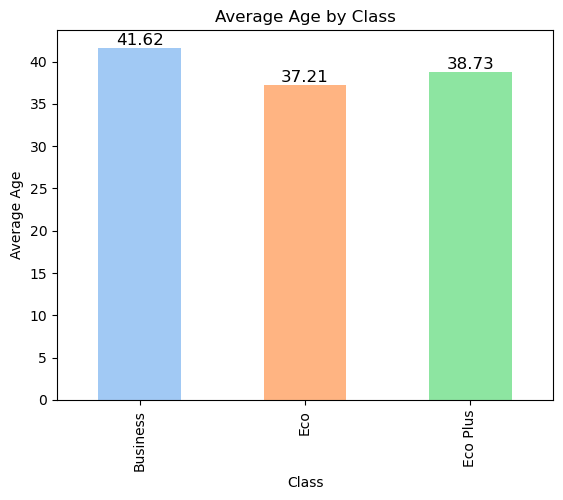

In [24]:
avg_age_by_class = dataset.groupby('Class')['Age'].mean()
pastel_colors = sns.color_palette("pastel", len(avg_age_by_class))

ax = avg_age_by_class.plot(kind='bar', color=pastel_colors)
plt.title('Average Age by Class')
plt.xlabel('Class')
plt.ylabel('Average Age')

# Add data labels above the bars
for i, (bar_height, color) in enumerate(zip(avg_age_by_class, pastel_colors)):
    ax.text(i, bar_height, f'{bar_height:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()


**Discussion:** 

In the above visualization, we can see relationship between Class and Average Age.
   - Here, we can see average age of people travelling in Business class is 41.62, Eco class is 37.21 and Eco Plus is 38.73.
   - This observation can be utilized to cater services in airlines to that particular age group
   - It can also be used to understand the preference of class for avg age group.


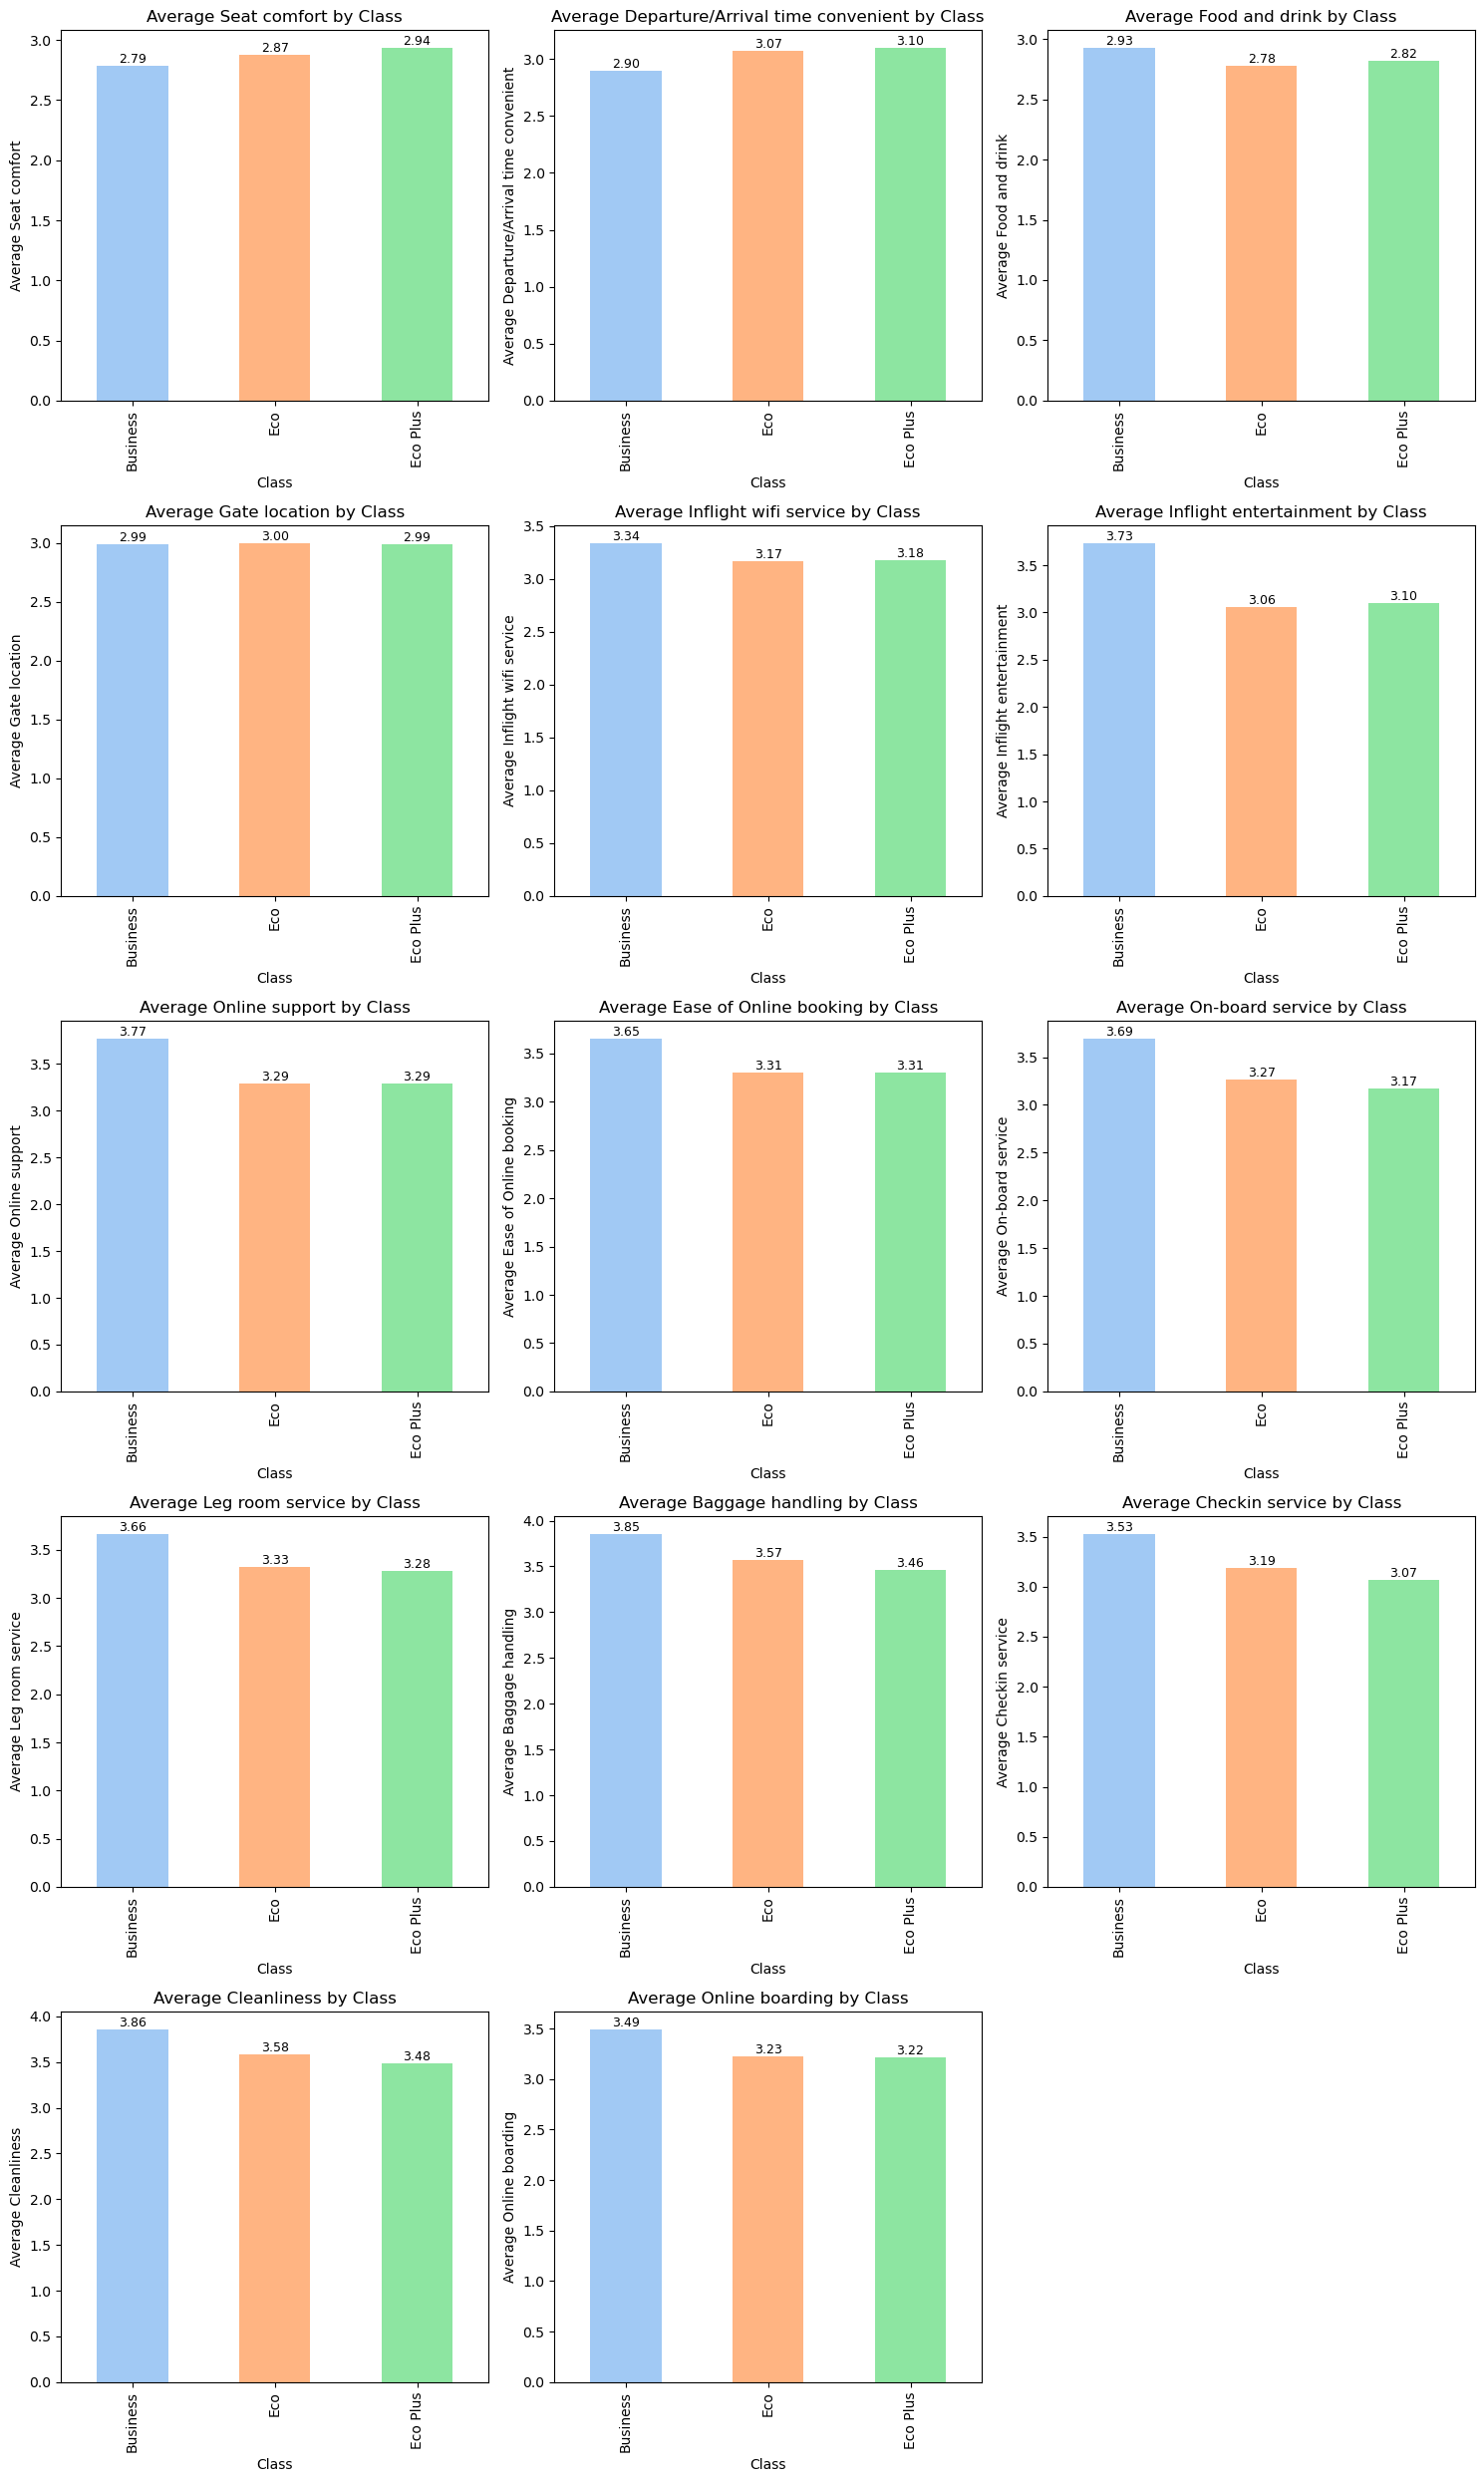

In [25]:
attributes = ['Seat comfort', 'Departure/Arrival time convenient', 
              'Food and drink', 'Gate location', 'Inflight wifi service', 
              'Inflight entertainment', 'Online support', 'Ease of Online booking',
              'On-board service', 'Leg room service', 'Baggage handling', 
              'Checkin service', 'Cleanliness', 'Online boarding']

avg_attributes_by_class = dataset.groupby('Class')[attributes].mean()

sns.set_palette("pastel")
num_rows = (len(attributes) + 2) // 3  
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, attr in enumerate(attributes):
    ax = avg_attributes_by_class[attr].plot(kind='bar', ax=axes[i], color=sns.color_palette())
    ax.set_title(f'Average {attr} by Class')
    ax.set_xlabel('Class')
    ax.set_ylabel(f'Average {attr}')
    ax.legend().remove()  
    
    for j, class_label in enumerate(avg_attributes_by_class.index):
        value = avg_attributes_by_class[attr][class_label]
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

for i in range(len(attributes), num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Dicussion:**

- The above visualizations show detailed analysis for all attributes related to rating vs class the passenger was travelling in.
- This is done analyse average ratings given by participants travelling in different class. This will help in understanding if services provided by airline differs in different class of the airline.
- Looking at the overall results, there isn't a significant change for avg ratings given by passengers from different class. 
- This helps us understand that the overall serice given by the airline is similar across all the classes with slight differece in the average ratings within classes


In [26]:
clean_data = dataset.copy()


**Discussion:**

Created a copy of my original dataset so that I can perform data cleaning steps on this csv.


In [27]:
#Missing Values
MVal = dataset.isna().sum()
missingval = MVal[MVal > 0]

if not missingval.empty:
    print("\nOriginal Dataset: Missing Values Information:")
    print(missingval)
else:
    print("\nOriginal Dataset: No missing values found in any column.")

missing_values = clean_data.isnull().sum()

if not missing_values.empty:
    for column in missing_values.index:
        if missing_values[column] > 0:
            if pd.api.types.is_numeric_dtype(clean_data[column]):
                average_value = clean_data[column].mean()
                
                clean_data[column].fillna(average_value, inplace=True)
                print(f"Replaced missing values in numeric column '{column}' with the average value: {average_value}")
            elif pd.api.types.is_string_dtype(clean_data[column]):
                clean_data[column].fillna('Unknown', inplace=True)
                print(f"Replaced missing values in string column '{column}' with 'Unknown'")

    print("\nNew Dataset: Missing Values Replaced")
else:
    print("\nNew Dataset: No missing values found in any column.")



Original Dataset: Missing Values Information:
satisfaction_v2               1
Inflight wifi service         1
Arrival Delay in Minutes    393
dtype: int64
Replaced missing values in string column 'satisfaction_v2' with 'Unknown'
Replaced missing values in numeric column 'Inflight wifi service' with the average value: 3.2491145672928856
Replaced missing values in numeric column 'Arrival Delay in Minutes' with the average value: 15.091267144445817

New Dataset: Missing Values Replaced


In [28]:
data = ['Inflight wifi service','Arrival Delay in Minutes']
clean_data[data].describe()


,Inflight wifi service,Arrival Delay in Minutes
count,129881.000000,129881.000000
mean,3.249115,15.091267
std,1.318815,38.407294
min,0.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,4.000000,13.000000
max,5.000000,1584.000000


In [29]:
data2 = ['Inflight wifi service','Arrival Delay in Minutes']
dataset[data2].describe()

,Inflight wifi service,Arrival Delay in Minutes
count,129880.000000,129488.000000
mean,3.249115,15.091267
std,1.318820,38.465534
min,0.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,4.000000,13.000000
max,5.000000,1584.000000


**Handle Missing Values:**

- Missing values are observed in the following cols:
    - satisfaction_v2               1
    - Inflight wifi service         1
    - Arrival Delay in Minutes    393

Here, while handling these values it is observed that 'satisfaction_v2' is string and other two attributes are 'numeric'
- Here, the string value is replaced by 'Unknown'
- The numeric attributes 'inflight wifi service' and 'Arrival delay in mins' have been replaced by average value of that attribute.
- We can see:
    - clean_data.describe shows the count has been now updated to '129881.000000' from '129488.000000' for Arrival Delay in Minutes
    - clean_data.describe shows the count has been now updated to '129881.000000' from '129881.000000' for Inflight wifi service.
    - similarly, for 'satisfaction_v2' missing value has been replaced.



In [30]:
#Drop Duplicates
clean_data = clean_data.drop_duplicates()

In [31]:
clean_data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249124,3.383477,3.519703,3.472336,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318816,1.346059,1.306511,1.308127,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.407410
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,33.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [32]:
duplicate_rows1 = clean_data.duplicated()
duplicates1 = clean_data[duplicate_rows1]
print("Duplicate Values Information:" if not duplicates1.empty else "No duplicate values found in the dataset.")
print(duplicates1.head(23))

No duplicate values found in the dataset.
Empty DataFrame
Columns: [satisfaction_v2, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Seat comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding, Departure Delay in Minutes, Arrival Delay in Minutes, Age Group]
Index: []


**Discussion:**

- To handle duplicate entries, I have removed these entries.
- In our dataset, there was one duplicate entry. This has been removed. This step is taken so that redundant information is removed and ths data is now consistent
- Now the count is updated to '129880.000000' for all attributes from '129881.000000' for all attributes

In [33]:
#Outlier handling
NumCol = clean_data.select_dtypes(include=[np.number])
Q1 = NumCol.quantile(0.25)
Q3 = NumCol.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5

In [34]:
clean_data_copy = clean_data.copy()

def cap_and_floor_outliers(column):
    lower_bound = Q1[column] - outlier_threshold * IQR[column]
    upper_bound = Q3[column] + outlier_threshold * IQR[column]
    
    clean_data_copy.loc[clean_data_copy[column] > upper_bound, column] = upper_bound
    
    clean_data_copy.loc[clean_data_copy[column] < lower_bound, column] = lower_bound

for column in outlier_df.columns:
    if outlier_df[column].any():
        cap_and_floor_outliers(column)

In [35]:
data3 = ['Flight Distance','Ease of Online booking', 'On-board service', 'Checkin service','Departure Delay in Minutes','Arrival Delay in Minutes']
dataset[data3].describe()

,Flight Distance,Ease of Online booking,On-board service,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes
count,129881.000000,129881.000000,129881.000000,129881.000000,129881.000000,129488.000000
mean,1981.408281,3.472325,3.465064,3.340804,14.713838,15.091267
std,1027.111689,1.308129,1.270837,1.260578,38.071006,38.465534
min,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1359.000000,2.000000,3.000000,3.000000,0.000000,0.000000
50%,1925.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,2544.000000,5.000000,4.000000,4.000000,12.000000,13.000000
max,6951.000000,33.000000,5.000000,5.000000,1592.000000,1584.000000


In [36]:
data4 = ['Flight Distance','Ease of Online booking', 'On-board service', 'Checkin service','Departure Delay in Minutes','Arrival Delay in Minutes']
clean_data_copy[data4].describe()

,Flight Distance,Ease of Online booking,On-board service,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,1969.775073,3.472155,3.516200,3.399985,7.380798,7.955050
std,994.672868,1.305666,1.177227,1.156760,11.209935,11.969676
min,50.000000,0.000000,1.500000,1.500000,0.000000,0.000000
25%,1359.000000,2.000000,3.000000,3.000000,0.000000,0.000000
50%,1925.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,2544.000000,5.000000,4.000000,4.000000,12.000000,13.000000
max,4321.500000,9.500000,5.000000,5.000000,30.000000,32.500000


**Discussion:**

- Following outliers and it's good range was identified:

 Flight Distance has 2581 outliers and - Good Range: [-418.5, 4321.5].

 Ease of Online booking has 1 outliers and - Good Range: [-2.5, 9.5].

 On-board service has 13270 outliers and - Good Range: [1.5, 5.5].

 Checkin service has 15370 outliers and - Good Range: [1.5, 5.5].

 Departure Delay in Minutes has 18099 outliers and - Good Range: [-18.0, 30.0].

 Arrival Delay in Minutes has 17493 outliers and - Good Range: [-19.5, 32.5].

- Capping and flooring technique is used to handle these outliers.
- After replacing thr values which 10th and 90th percentile, we can see that the clean_data does not the outliers. And now the max has been updated to the outler bound. 
- This can be compared above where table for both dataset.describe() -> original dataset, clean_data_copy.dataset() -> outliers are handled.
- This step is taken to remove the errors and improve data quality.

In [37]:
unique_values = clean_data_copy['satisfaction_v2'].unique()
clean_data_copy['satisfaction_v2'] = np.where(clean_data_copy['satisfaction_v2'] != 'neutral or dissatisfied', 'Satisfied', clean_data_copy['satisfaction_v2'])

**Discussion:**

1. It was obsered that satisfaction_v2 attribute had spelling mistakes, extra space and a null value. 

2. Spelling mistake and extra space were both suggesting usage of 'satisfied'. Hence, these values were replaced by 'satisfied'

3. The null value was earlier replaced by 'Unknown' but it was identified that occurance for satisfied was more compared to 'neutral or disstisfied'. Hence, Unknown was replaced by satisfied.

4. This ensured that quality of data is good and all the errors from this column were removed.

***
## Section: 3.2 - Select Attributes
- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.
***

**Discussion:**

- After completing the data exploration stage, and undering the correlation between different attributes using crosstab, chi sq., pearson coef., ANOVA it was seen that all the attributes have significant correlation with eachother. 
- Also, after visualizing different graphs, the attributes give valuable information.
- Hence, I decided not to remove any attributes.

In [38]:
clean_data_copy.columns

Index(['satisfaction_v2', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Age Group'],
      dtype='object')

In [39]:
NewColumn = clean_data_copy['Age Group']
print(NewColumn)

id
1         Adults (18 to 64)
2         Adults (18 to 64)
3         Adults (18 to 64)
4         Adults (18 to 64)
5         Adults (18 to 64)
                ...        
129876    Adults (18 to 64)
129877    Adults (18 to 64)
129878    Adults (18 to 64)
129879    Adults (18 to 64)
129880    Adults (18 to 64)
Name: Age Group, Length: 129880, dtype: category
Categories (4, object): ['Children (0 to 12)' < 'Adolescents (13 to 17)' < 'Adults (18 to 64)' < 'Older Adults (above 65)']


**Discussion:**

1. I have added a new attribute called as 'Age Group' 

2. ['Children (0 to 12)' < 'Adolescents (13 to 17)' < 'Adults (18 to 64)' < 'Older Adults (above 65)']

3. This newly created attribute was used to analyse which age group travelles in which class, percentage of which age group travels most?

4. It will be helpful to gain meaningful insights in understanding preference for travelling for different age group.

In [40]:
clean_data_copy.describe(include = "all")

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Age Group
count,129880,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880
unique,2,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Satisfied,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults (18 to 64)
freq,71087,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114050
mean,NaN,NaN,NaN,39.427957,NaN,NaN,1969.775073,2.838597,2.990645,2.851994,2.990422,3.249124,3.383477,3.519703,3.472155,3.516200,3.485902,3.695673,3.399985,3.705759,3.352587,7.380798,7.955050,NaN
std,NaN,NaN,NaN,15.119360,NaN,NaN,994.672868,1.392983,1.527224,1.443729,1.305970,1.318816,1.346059,1.306511,1.305666,1.177227,1.292226,1.156483,1.156760,1.151774,1.298715,11.209935,11.969676,NaN
min,NaN,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,27.000000,NaN,NaN,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,40.000000,NaN,NaN,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,51.000000,NaN,NaN,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

In [41]:
#Encoding
encoding_mapping = {
    'satisfaction_v2' : {'neutral or dissatisfied' : 0, 'Satisfied' : 1},
    'Gender': {'Male': 0, 'Female': 1},
    'Customer Type': {'disloyal Customer': 0, 'Loyal Customer': 1},
    'Type of Travel': {'Business travel': 0, 'Personal Travel': 1},
    'Class': {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
}

clean_data_copy.replace(encoding_mapping, inplace=True)

In [42]:
clean_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   satisfaction_v2                    129880 non-null  int64   
 1   Gender                             129880 non-null  int64   
 2   Customer Type                      129880 non-null  int64   
 3   Age                                129880 non-null  int64   
 4   Type of Travel                     129880 non-null  int64   
 5   Class                              129880 non-null  int64   
 6   Flight Distance                    129880 non-null  float64 
 7   Seat comfort                       129880 non-null  int64   
 8   Departure/Arrival time convenient  129880 non-null  int64   
 9   Food and drink                     129880 non-null  int64   
 10  Gate location                      129880 non-null  int64   
 11  Inflight wifi service     

In [43]:
columns_to_convert = ['Inflight wifi service', 'Ease of Online booking', 'On-board service', 'Checkin service']

for column in columns_to_convert:
    clean_data_copy[column] = clean_data_copy[column].fillna(-1).round().astype('int64')
clean_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   satisfaction_v2                    129880 non-null  int64   
 1   Gender                             129880 non-null  int64   
 2   Customer Type                      129880 non-null  int64   
 3   Age                                129880 non-null  int64   
 4   Type of Travel                     129880 non-null  int64   
 5   Class                              129880 non-null  int64   
 6   Flight Distance                    129880 non-null  float64 
 7   Seat comfort                       129880 non-null  int64   
 8   Departure/Arrival time convenient  129880 non-null  int64   
 9   Food and drink                     129880 non-null  int64   
 10  Gate location                      129880 non-null  int64   
 11  Inflight wifi service     

**Discussion:**

1. Encoding on categorical variables is done to ensure that the model that will be built in next steps will do accurate predictions / classificatins.

1. After replacing missing values and outliers, it is observed that ['Inflight wifi service', 'Ease of Online booking', 'On-board service', 'Checkin service'] attributes are of float64 type. 

2. But these values should be integer as they lie between 0 to 5 int values.

3. Hence, I have transformed these values to int64. 

In [44]:
clean_data_copy.describe(include='all')

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Age Group
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adults (18 to 64)
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114050
mean,0.547328,0.507384,0.816908,39.427957,0.309416,0.593864,1969.775073,2.838597,2.990645,2.851994,2.990422,3.249122,3.383477,3.519703,3.472159,3.567285,3.485902,3.695673,3.459155,3.705759,3.352587,7.380798,7.955050,NaN
std,0.497757,0.499947,0.386743,15.119360,0.462255,0.621378,994.672868,1.392983,1.527224,1.443729,1.305970,1.318816,1.346059,1.306511,1.305685,1.096721,1.292226,1.156483,1.067395,1.151774,1.298715,11.209935,11.969676,NaN
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,1.000000,1.000000,1.000000,40.000000,0.000000,1.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,NaN
75%,1.000000,1.000000,1.000000,51.000000,1.000000,1.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


**Discussion:**

1. I feel that we should not decrease the size of dataset.

2. While performing modelling (traning / testing) more data is helpful.

3. Now, after performing data cleaning steps the quality of data is improved. It is consistent and does not contain any errors. 

In [45]:
file_path = "Clean_Data.csv"

clean_data_copy.to_csv(file_path) 


**Discussion:**

Saved the clean csv file for further use

**Reference Links:**

1. https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

2. https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

3. https://medium.com/@ugursavci/complete-exploratory-data-analysis-using-python-9f685d67d1e4

**Discussion:**

1. In this exercise I examined the dataset and performed exploratory data analysis. 
2. Here, I learnt different steps that are involved as a part of data preprocessing technique.
    - Describing the data, understanding different attributes and gaining indepth information regarding those attributes using various statiscical analysis techniques. 
    - Visualizing the attributes to find patterns and trends. I incorporated most of the attributes to understand how these attributes have impact in the overall ratings.
    - I explored different techniques to find relationship between attributes and observed that all the attributes are relevant and have significant association. 
    - Finding errors, inconsistencies, duplicated and outliers and handling them as a part of proprocessing stage. 
    - In this assignement, I used capping & flooring, encoding, unit transformation and other techniques as a part of EDA.
3. This execise helped me understand the importance of cleaning the data before using it for model traning for prediction / classification problems is essential. 
4. Having inconsistent data might create bias / inaccurate outcomes and may result in misinterpretation of the result.